In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### creating dataset

In [2]:
import os

path = 'D:/DATASCIENCE/DeepLearning-DS/Chapter 03/OpenCV/OpenCV-projects/Hand Written recognition/MINST/trainingSet/'
files = os.listdir(path)[:10]

classes = {'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9}

In [3]:
import cv2 as cv

x = []
y = []

for cl in classes:
    pth = path+cl

    for imgs in os.listdir(pth):
        img = cv.imread(pth+'/'+imgs, 0)
        x.append(img)
        y.append(classes[cl])


In [4]:
x = np.array(x)
y = np.array(y)

### analyse data

2


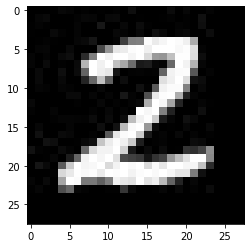

In [5]:
plt.imshow(x[10000], cmap='gray')
print(y[10000])

In [6]:
x.shape

(42000, 28, 28)

### prepare data

In [7]:
x_new = x.reshape(len(x), -1)

In [8]:
x_new.shape

(42000, 784)

### split data

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=0)

### feature scaling

In [10]:
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(x_train)
xtest = scaler.transform(x_test)

### PCA

In [11]:
from sklearn.decomposition import PCA

pca = PCA(0.98)

xtr = pca.fit_transform(xtrain)
xts = pca.transform(xtest)

### Train model

In [12]:
lgbm = LGBMClassifier()
lgbm.fit(xtr, y_train)

LGBMClassifier()

### prediction

In [13]:
tr_pred = lgbm.predict(xtr)
ts_pred = lgbm.predict(xts)

In [14]:
print('train score: ', accuracy_score(y_train, tr_pred))
print('test score: ',accuracy_score(y_test, ts_pred))

train score:  1.0
test score:  0.9572619047619048


3


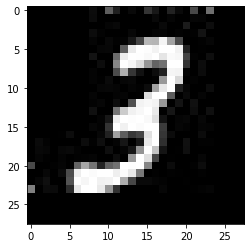

In [15]:
plt.imshow(xtest[0].reshape(28,28), cmap='gray')
print(y_test[0])

### test model

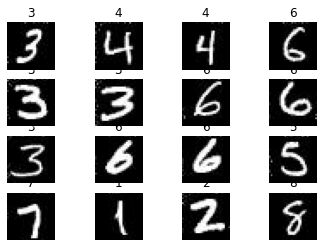

In [16]:
decode = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9'}

for i in range(16):
    
    plt.subplot(4,4, i+1)
    plt.imshow(xtest[i].reshape(28,28), cmap='gray')
    plt.title(decode[ts_pred[i]])
    plt.axis('off')


### Testing model on real data

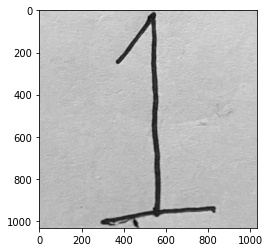

In [29]:
my_img = cv.imread(r'D:\DATASCIENCE\DeepLearning-DS\Chapter 03\OpenCV\OpenCV-projects\Hand Written recognition\mydigits\1.PNG', 0)
plt.imshow(my_img, cmap='gray')

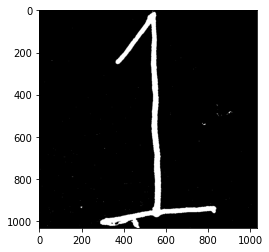

In [30]:
retval, dst = cv.threshold(my_img, 100, 255, cv.THRESH_BINARY_INV)
plt.imshow(dst, cmap='gray')

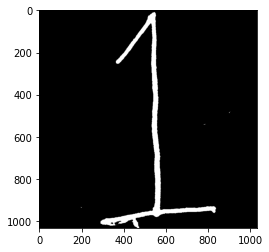

In [35]:
kernel = np.ones((3,3), np.uint8)

ret, threshold = cv.threshold(dst, 200, 255, cv.THRESH_BINARY)

erosion = cv.erode(threshold, kernel)

plt.imshow(erosion, cmap='gray')

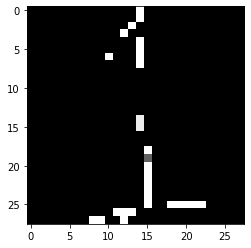

In [36]:
img = cv.resize(erosion, (28,28))
plt.imshow(img, cmap='gray')

In [37]:
img = pca.transform(img.reshape(1,-1)/255)

In [38]:
decode[lgbm.predict(img)[0]]

'1'